<a href="https://akademie.datamics.com/kursliste/">![title](screenshots/bg_datamics_top.png)</a>

<center><em>© Datamics</em></center><br><center><em>Check out our courses on <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em>

<div class="alert alert-info">
    <h1>  Dataset: Wine Quality prediction </h1>
</div>

*This datasets is related to red variants of the Portuguese. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).*

*The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).*

**Input Features:** 
- Fixed acidity 
- Volatile acidity
- Citric acid
- Residual sugar
- Chlorides
- Free sulfur dioxide
- Total sulfur dioxide
- Density
- pH
- Sulphate
- Alcohol

**Output column:** 
- Quality (score between 0 and 10)


Data is available at: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?resource=download

### Setup data
- Create a folder named data within the current directory, <br> it should look something like this <code> < path to Jupyter Notebook >/mlcon_mlflow/data </code>
- Unzip and put the downloaded data in this folder

<div class="alert alert-info"> 
<h2>Model Training</h2>
</div>

### 0.Installation

In [ ]:
# pip install pandas

In [ ]:
# pip install numpy

In [ ]:
# pip install seaborn

In [ ]:
# pip install scikit-learn

In [1]:
# import required packages

import pandas as pd
import numpy as np

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics
    
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 1. Load Data

In [2]:
# Read csv file
df = pd.read_csv("data/winequality-red.csv")

In [3]:
# Display top 5 rows of the DataFrame
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Explore data with info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


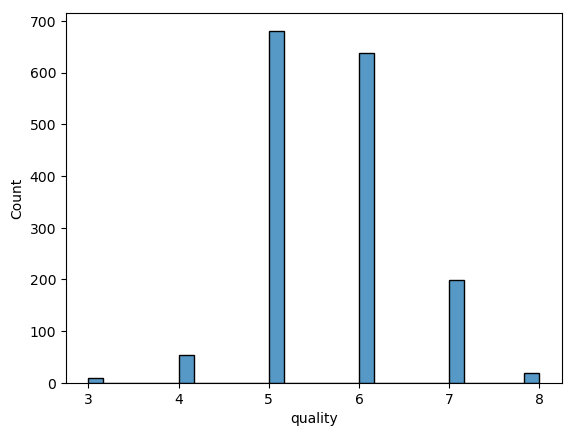

In [5]:
# Check the quality distribution with histogram
sns.histplot(df['quality'])

### 2. Split data

In [6]:
# Set features (X) and prediction (Y) columns
X = df.drop('quality',axis=1)
y = df['quality']

In [7]:
# Split the data into training and test sets. (0.75, 0.25) split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

In [8]:
# Check the data split
df.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1599, 12), (1199, 11), (1199,), (400, 11), (400,))

In [9]:
# check labels
y_train

1588    6
1228    7
368     5
670     5
1066    7
       ..
16      7
58      5
277     6
255     5
1344    5
Name: quality, Length: 1199, dtype: int64

### 3. Train Linear Regression Model

In [10]:
# define alpha - Constant that multiplies the penalty terms.
alpha = 0.5

# define l1 ratio 
l1 = 0.5

# ElasticNet is a linear regression model trained with both l1 and l2 - norm regularization
lr = ElasticNet(alpha = alpha, l1_ratio = l1)

In [11]:
# Fit on train split of data
lr.fit(X_train, y_train)

ElasticNet(alpha=0.5)

In [14]:
# define evaluation function
def eval_metrics(ground_truth, pred):
    
    rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
    mae = metrics.mean_absolute_error(ground_truth, pred)
    r2 = metrics.r2_score(ground_truth, pred)
    
    return rmse, mae, r2

In [15]:
# get prediction on the train set
y_pred = lr.predict(X_train)

In [16]:
# get evaluation on the train dataset
(rmse, mae, r2) = eval_metrics(y_train,y_pred)

In [17]:
# Print the model metrics on Training dataset
print(f"Dataset: Training \nRMSE:{rmse}\nMAE: {mae}\nR2:{r2}")

Dataset: Training 
RMSE:0.7577741148316872
MAE: 0.61353431258984
R2:0.12054192894819826


## Putting it all together

In [18]:
def eval_metrics(ground_truth, pred):
    
    rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
    mae = metrics.mean_absolute_error(ground_truth, pred)
    r2 = metrics.r2_score(ground_truth, pred)
    
    return rmse, mae, r2

# Read the wine-quality csv file
df = pd.read_csv("data/winequality-red.csv")
np.random.seed(40)

# Split the data into training and test sets. (0.75, 0.25) split.
X = df.drop('quality',axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

### Train the model ###
alpha = 0.5
l1 = 0.5

lr = ElasticNet(alpha=alpha, l1_ratio=l1)
lr.fit(X_train,y_train)

# Get prediction
y_pred = lr.predict(X_train)

# Check model performance on training
(rmse, mae, r2) = eval_metrics(y_train,y_pred)
print(f"Dataset: Training \nRMSE:{rmse}\nMAE: {mae}\nR2:{r2}")

Dataset: Training 
RMSE:0.7577741148316872
MAE: 0.61353431258984
R2:0.12054192894819826


<div class="alert alert-info"> 
<h2>Let's bring MLflow into the picture</h2>
</div>

<div class="alert alert-warning">
    <h3> 1. Basics </h3>
</div>

1. Go to the Terminal
2. Run the code ```mlflow ui``` (path: where this notebook is stored)

In [20]:
import mlflow

In [21]:
def eval_metrics(ground_truth, pred):
    
    rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
    mae = metrics.mean_absolute_error(ground_truth, pred)
    r2 = metrics.r2_score(ground_truth, pred)
    
    return rmse, mae, r2

# Read the wine-quality csv file
df = pd.read_csv("data/winequality-red.csv")
np.random.seed(40)

# Split the data into training and test sets. (0.75, 0.25) split.
X = df.drop('quality',axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

### Train the model ###

#######################################################
################### MLflow code #######################
#######################################################

with mlflow.start_run():
    
    alpha = 0.5
    l1 = 0.5
    
    lr = ElasticNet(alpha=alpha, l1_ratio=l1)
    lr.fit(X_train,y_train)

    # Get prediction on Test dataset
    y_pred = lr.predict(X_train)

    # Check model performance on test
    (rmse, mae, r2) = eval_metrics(y_train,y_pred)
    print(f"Dataset: Training \nRMSE:{rmse}\nMAE: {mae}\nR2:{r2}")

    ###################### Logging code ######################
    
    # log parameters of the model
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1_ratio", l1)
    
    # log metrics 
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)
    

Dataset: Training 
RMSE:0.7577741148316872
MAE: 0.61353431258984
R2:0.12054192894819826


### Checkout the MLflow dashboard 
- Go to the link in the terminal (default is <a href='http://127.0.0.1:5000'> http://127.0.0.1:5000 </a>)

#### Perform hyperparameter tuning without
- Grid search
- Random search<br>
(beyond the scope of this workshop, for more information check - https://github.com/mlflow/mlflow/tree/master/examples/hyperparam )

#### How then? Using the MLflow loggers

Try:
```python
alpha = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
l1 = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
```

In [33]:
alpha = 1.0
l1 = 0.5
    

#######################################################
################### MLflow code #######################
#######################################################

with mlflow.start_run():
    lr = ElasticNet(alpha=alpha, l1_ratio=l1)
    lr.fit(X_train,y_train)

    # Get prediction on Test dataset
    y_pred = lr.predict(X_train)

    # Check model performance on test
    (rmse, mae, r2) = eval_metrics(y_train,y_pred)
    print(f"Dataset: Training \nRMSE:{rmse}\nMAE: {mae}\nR2:{r2}")

    ###################### Logging code ######################
    
    #log parameters of the model
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1_ratio", l1)
    
    # log metrics 
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)

Dataset: Training 
RMSE:0.7920282627113675
MAE: 0.6501030578987284
R2:0.039235460441300996


### Try on test dataset?

In [ ]:
with mlflow.start_run():

    # Get prediction on Test dataset
    y_pred = lr.predict(X_test)

    # Check model performance on test
    (rmse, mae, r2) = eval_metrics(y_test,y_pred)
    print(f"Dataset: Test \nRMSE:{rmse}\nMAE: {mae}\nR2:{r2}")

    #log parameters of the model
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1_ratio", l1)
    
    # log metrics 
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)

<div class="alert alert-warning">
    <h3> 2. Using mlflow functions </h3>
</div>

- Creating and Setting `Experiment` name using `mlflow.set_experiment(name)`
- Adding ` Current Run` name
- Adding `Tags`

In [34]:
def eval_metrics(ground_truth, pred):
    
    rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
    mae = metrics.mean_absolute_error(ground_truth, pred)
    r2 = metrics.r2_score(ground_truth, pred)
    
    return rmse, mae, r2

# Read the wine-quality csv file
df = pd.read_csv("data/winequality-red.csv")
np.random.seed(40)

# Split the data into training and test sets. (0.75, 0.25) split.
X = df.drop('quality',axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

### Train the model ###

#######################################################
################### MLflow code #######################
#######################################################

# set experiment name
experiment_name = "Experiment-1"

# set current run name
current_run_name = "setting new experiment"

# adding tags as dict{} for each run
tags = {"Demo":True,
       "created by": "Saumya"
       }

# Set experiment name, if not created already it creates a new experiment
mlflow.set_experiment(experiment_name)

with mlflow.start_run(run_name=current_run_name):
    
    alpha = 0.5
    l1 = 0.5
    
    lr = ElasticNet(alpha=alpha, l1_ratio=l1)
    lr.fit(X_train,y_train)

    # Get prediction on Test dataset
    y_pred = lr.predict(X_train)

    # Check model performance on test
    (rmse, mae, r2) = eval_metrics(y_train,y_pred)
    print(f"Dataset: Training \nRMSE:{rmse}\nMAE: {mae}\nR2:{r2}")

    ###################### Logging code ######################
    
    #log parameters of the model
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1_ratio", l1)
    
    # log metrics 
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)
    
    ############ log tags ##############
    mlflow.set_tags(tags)
   


2022/12/01 10:29:08 INFO mlflow.tracking.fluent: Experiment with name 'Experiment-1' does not exist. Creating a new experiment.


Dataset: Training 
RMSE:0.7577741148316872
MAE: 0.61353431258984
R2:0.12054192894819826


<div class="alert alert-warning">
    <h3> 3. Adding artifact store </h3>
</div>

- check current storage of model metadata
- create a new artifact store locally `mlflow.create_experiment(experiment_name, location)`
- log the regression model for the storing its artifacts using `mlflow.sklearn.log_model(model, "name")`

In [36]:
def eval_metrics(ground_truth, pred):
    
    rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
    mae = metrics.mean_absolute_error(ground_truth, pred)
    r2 = metrics.r2_score(ground_truth, pred)
    
    return rmse, mae, r2

# Read the wine-quality csv file
df = pd.read_csv("data/winequality-red.csv")
np.random.seed(40)

# Split the data into training and test sets. (0.75, 0.25) split.
X = df.drop('quality',axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

### Train the model ###

#######################################################
################### MLflow code #######################
#######################################################

# set experiment name
experiment_name = "Experiment-2"

# set curent run name
current_run_name = "With new artifact location"

# set artifact location - new folder
artifact_location = "/Users/saumyagoyal/JupyterNotebook/mlcon_mlflow/mlflow_artifacts"

# adding tags for each run
tags = {"Demo": "True",
        "created-by": "dev team ID"}

# Create(location) and set a new experiment name
mlflow.create_experiment(experiment_name, artifact_location)
mlflow.set_experiment(experiment_name)

with mlflow.start_run(run_name=current_run_name):
    
    alpha = 0.1
    l1 = 0.5
    
    lr = ElasticNet(alpha=alpha, l1_ratio=l1)
    lr.fit(X_train,y_train)

    # Get prediction on Test dataset
    y_pred = lr.predict(X_train)

    # Check model performance on test
    (rmse, mae, r2) = eval_metrics(y_train,y_pred)
    print(f"Dataset: Training \nRMSE:{rmse}\nMAE: {mae}\nR2:{r2}")

    ###################### Logging code ######################
    
    #log parameters of the model
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1_ratio", l1)
    
    # log metrics 
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)
    
    # log tags
    mlflow.set_tags(tags)

    ########### logging the model in artifact store ###################
    

Dataset: Training 
RMSE:0.7070235814227004
MAE: 0.5542616149756437
R2:0.23439739007007954


In [38]:
def eval_metrics(ground_truth, pred):
    
    rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
    mae = metrics.mean_absolute_error(ground_truth, pred)
    r2 = metrics.r2_score(ground_truth, pred)
    
    return rmse, mae, r2

# Read the wine-quality csv file
df = pd.read_csv("data/winequality-red.csv")
np.random.seed(40)

# Split the data into training and test sets. (0.75, 0.25) split.
X = df.drop('quality',axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

### Train the model ###

#######################################################
################### MLflow code #######################
#######################################################

# set experiment name
experiment_name = "Experiment-3"

# set curent run name
current_run_name = "Logging sklearn model"

# set artifact location - new folder
artifact_location = "/Users/saumyagoyal/JupyterNotebook/mlcon_mlflow/mlflow_artifacts"

# adding tags for each run
tags = {"Demo": "True",
        "created-by": "dev team ID"}

# Create(location) and set a new experiment name
mlflow.create_experiment(experiment_name, artifact_location)
mlflow.set_experiment(experiment_name)

with mlflow.start_run(run_name=current_run_name):
    
    alpha = 0.1
    l1 = 0.5
    
    lr = ElasticNet(alpha=alpha, l1_ratio=l1)
    lr.fit(X_train,y_train)

    # Get prediction on Test dataset
    y_pred = lr.predict(X_train)

    # Check model performance on test
    (rmse, mae, r2) = eval_metrics(y_train,y_pred)
    print(f"Dataset: Training \nRMSE:{rmse}\nMAE: {mae}\nR2:{r2}")

    ###################### Logging code ######################
    
    #log parameters of the model
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1_ratio", l1)
    
    # log metrics 
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)
    
    # log tags
    mlflow.set_tags(tags)

    ########### logging the model in artifact store ###################
    mlflow.sklearn.log_model(lr, "Linear regression model")

Dataset: Training 
RMSE:0.7070235814227004
MAE: 0.5542616149756437
R2:0.23439739007007954


<div class="alert alert-success">
    <h3> To be continued in the next session </h3>
</div> 